<a href="https://colab.research.google.com/github/Hellavn/Machine_Learning_Projects/blob/main/plant_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split
from pandas._libs.hashtable import value_count
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import glob

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
sns.set_style('dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


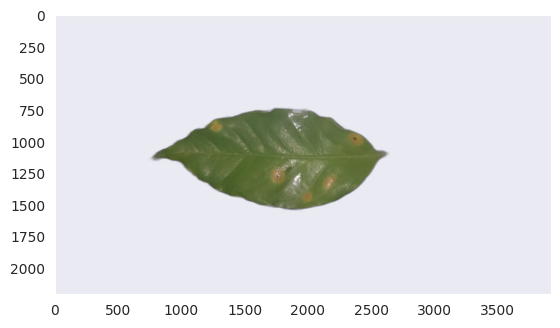

In [ ]:
im = plt.imread('/content/drive/MyDrive/Colab Notebooks/omdena/sao-paulo-brazil-plant-diseases/M.Fisher/Hemileia_vastatrix/Hemileia_vastatrix/DSC_0307.png')
plt.imshow(im)

In [ ]:
files = glob.glob('/content/drive/MyDrive/Colab Notebooks/omdena/sao-paulo-brazil-plant-diseases/M.Fisher/**/*.png', recursive = True)

In [ ]:
len(files)

362

In [ ]:
df = pd.DataFrame({'path':files})

In [ ]:
df

,path
0,/content/drive/MyDrive/Colab Notebooks/omdena/...
1,/content/drive/MyDrive/Colab Notebooks/omdena/...
2,/content/drive/MyDrive/Colab Notebooks/omdena/...
3,/content/drive/MyDrive/Colab Notebooks/omdena/...
4,/content/drive/MyDrive/Colab Notebooks/omdena/...
...,...
357,/content/drive/MyDrive/Colab Notebooks/omdena/...
358,/content/drive/MyDrive/Colab Notebooks/omdena/...
359,/content/drive/MyDrive/Colab Notebooks/omdena/...
360,/content/drive/MyDrive/Colab Notebooks/omdena/...


In [ ]:
df['path'][0]

'/content/drive/MyDrive/Colab Notebooks/omdena/sao-paulo-brazil-plant-diseases/M.Fisher/Phoma_ssp/Phoma_ssp/Mancha phoma DSC_0420.png'

In [ ]:
df['class'] = df['path'].apply(lambda x: x.split('/')[8])

In [ ]:
df

,path,class
0,/content/drive/MyDrive/Colab Notebooks/omdena/...,Phoma_ssp
1,/content/drive/MyDrive/Colab Notebooks/omdena/...,Phoma_ssp
2,/content/drive/MyDrive/Colab Notebooks/omdena/...,Phoma_ssp
3,/content/drive/MyDrive/Colab Notebooks/omdena/...,Phoma_ssp
4,/content/drive/MyDrive/Colab Notebooks/omdena/...,Phoma_ssp
...,...,...
357,/content/drive/MyDrive/Colab Notebooks/omdena/...,Pseudomonas_syringae
358,/content/drive/MyDrive/Colab Notebooks/omdena/...,Pseudomonas_syringae
359,/content/drive/MyDrive/Colab Notebooks/omdena/...,Pseudomonas_syringae
360,/content/drive/MyDrive/Colab Notebooks/omdena/...,Pseudomonas_syringae


In [ ]:
df['class'].value_counts()

Leucoptera_coffeella    267
Hemileia_vastatrix       39
Pseudomonas_syringae     29
Phoma_ssp                27
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

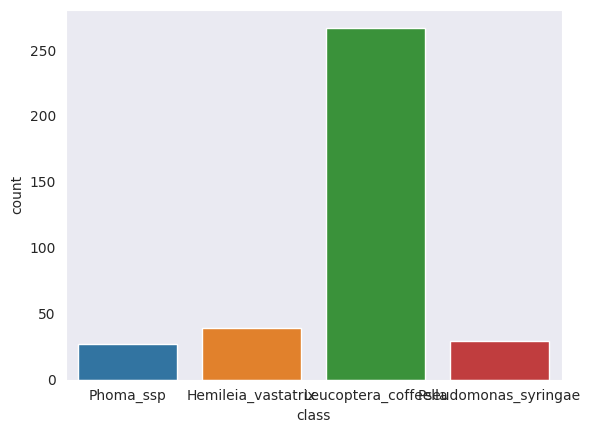

In [ ]:
sns.countplot(x=df["class"])

In [ ]:
x = df[['path']]
# y.shape should be (N, 1)
y = df['class']

In [ ]:
x

,path
0,/content/drive/MyDrive/Colab Notebooks/omdena/...
1,/content/drive/MyDrive/Colab Notebooks/omdena/...
2,/content/drive/MyDrive/Colab Notebooks/omdena/...
3,/content/drive/MyDrive/Colab Notebooks/omdena/...
4,/content/drive/MyDrive/Colab Notebooks/omdena/...
...,...
357,/content/drive/MyDrive/Colab Notebooks/omdena/...
358,/content/drive/MyDrive/Colab Notebooks/omdena/...
359,/content/drive/MyDrive/Colab Notebooks/omdena/...
360,/content/drive/MyDrive/Colab Notebooks/omdena/...


In [ ]:
y

0                 Phoma_ssp
1                 Phoma_ssp
2                 Phoma_ssp
3                 Phoma_ssp
4                 Phoma_ssp
               ...         
357    Pseudomonas_syringae
358    Pseudomonas_syringae
359    Pseudomonas_syringae
360    Pseudomonas_syringae
361    Pseudomonas_syringae
Name: class, Length: 362, dtype: object

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x,y)

In [ ]:
X_resampled

,path
0,/content/drive/MyDrive/Colab Notebooks/omdena/...
1,/content/drive/MyDrive/Colab Notebooks/omdena/...
2,/content/drive/MyDrive/Colab Notebooks/omdena/...
3,/content/drive/MyDrive/Colab Notebooks/omdena/...
4,/content/drive/MyDrive/Colab Notebooks/omdena/...
...,...
103,/content/drive/MyDrive/Colab Notebooks/omdena/...
104,/content/drive/MyDrive/Colab Notebooks/omdena/...
105,/content/drive/MyDrive/Colab Notebooks/omdena/...
106,/content/drive/MyDrive/Colab Notebooks/omdena/...


In [ ]:
 y_resampled

0        Hemileia_vastatrix
1        Hemileia_vastatrix
2        Hemileia_vastatrix
3        Hemileia_vastatrix
4        Hemileia_vastatrix
               ...         
103    Pseudomonas_syringae
104    Pseudomonas_syringae
105    Pseudomonas_syringae
106    Pseudomonas_syringae
107    Pseudomonas_syringae
Name: class, Length: 108, dtype: object

<Axes: xlabel='class', ylabel='count'>

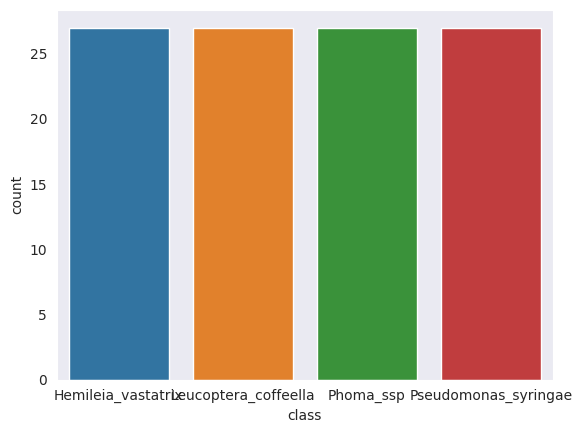

In [ ]:
sns.countplot(x= y_resampled)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1)

In [ ]:
def build_model():

    model = Sequential()

    model.add(layers.Conv2D(filters=32, kernel_size=2, activation="relu", input_shape=(2048, 1536, 1)))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(28, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    return model

In [ ]:
model = build_model()

In [ ]:
data_generator = ImageDataGenerator(rotation_range=20, rescale=0.2/255, validation_split=0.15)

In [ ]:
df_train = pd.concat([x_train, y_train], axis=1)

In [ ]:
BATCH_SIZE = 50

In [ ]:
train_generator = data_generator.flow_from_dataframe(dataframe=df_train, x_col='path', y_col='class', class_mode='categorical', batch_size=BATCH_SIZE, target_size=(2048, 15364), subset='training')

Found 83 validated image filenames belonging to 4 classes.


In [ ]:
validation_generator = data_generator.flow_from_dataframe(dataframe=df_train, x_col='path', y_col='class', class_mode='categorical', batch_size=BATCH_SIZE, target_size=(2048, 1536), subset='validation')

Found 14 validated image filenames belonging to 4 classes.


In [ ]:
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('pathogens_image_model.hdf5',
                             monitor='val_loss',
                             verbose=1, mode='min',
                             save_best_only=True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                                   min_delta=0.001,
                                   patience=1,
                                   mode='min',
                                   verbose=1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2047, 1535, 32)    160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1023, 767, 32)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1023, 767, 32)     0         
                                                                 
 flatten (Flatten)           (None, 25108512)          0         
                                                                 
 dense (Dense)               (None, 28)                703038364 
                                                                 
 dense_1 (Dense)             (None, 6)                 174       
                                                        

In [ ]:
tf.config.run_functions_eagerly(False)

In [ ]:
model.fit(train_generator, callbacks=[checkpoint, early_stop],  steps_per_epoch = train_generator.samples//BATCH_SIZE,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples//BATCH_SIZE, epochs=50)